In [1]:
#!pip install chart_studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.offline as pyo
#import chart_studio.plotly as py

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_original = df.copy()
df_test_original = df_test.copy()

In [4]:
print(df.shape)
df.head()

(88858, 10)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
print(df_test.shape)
df_test.head()

(59310, 9)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [7]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
cat_col = ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']
num_col = ['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']
tag_col = 'Crop_Damage'


In [9]:
df[tag_col].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [10]:
# data = [go.Histogram(x = df[tag_col])]
# layout = go.Layout(title = 'Crop Damage')
# fig = go.Figure(data = data, layout = layout)
# py.iplot(fig, filename='jupyter-basic_bar')
#pyo.plot(fig)

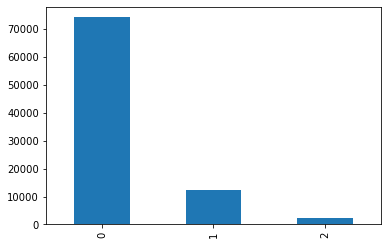

In [11]:
df[tag_col].value_counts().plot.bar()

# Univariant Analysis

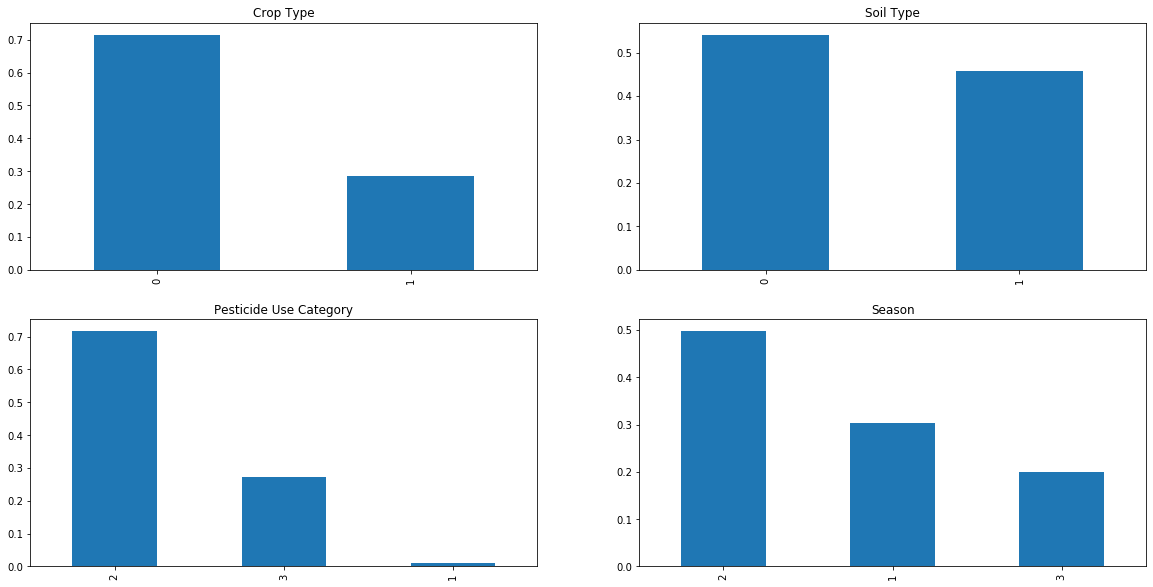

In [12]:
plt.figure(1)
subplotplace = 221
for col in cat_col:
    plt.subplot(subplotplace)
    df[col].value_counts(normalize = True).plot.bar(figsize = (20,10),title = col.replace('_',' '))
    subplotplace += 1

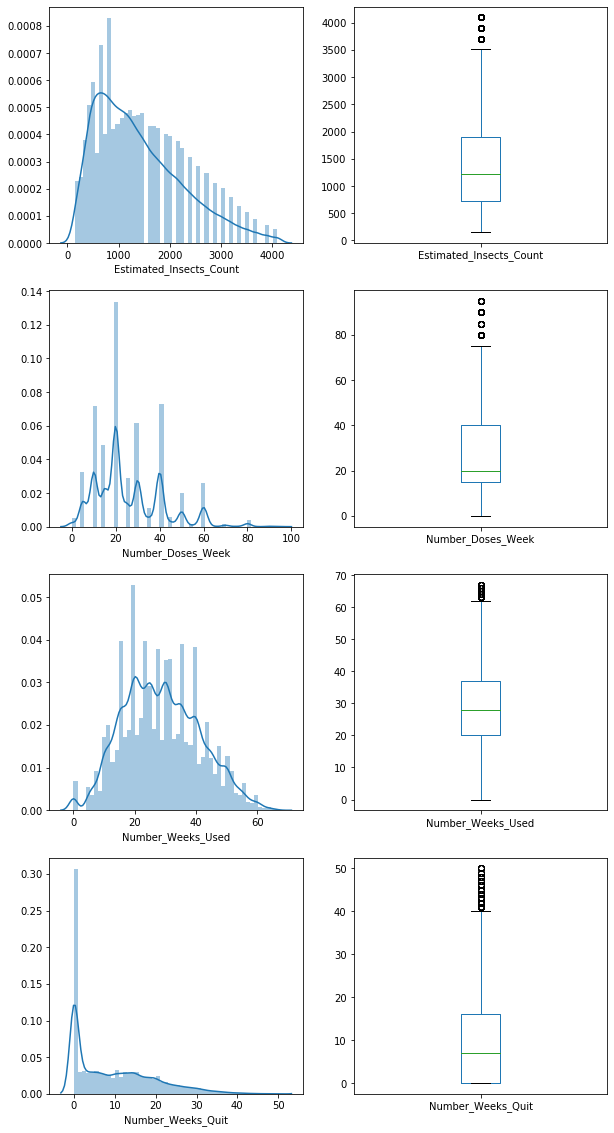

In [13]:
plt.figure(1,figsize = (10,20))
subplotplace = 421
for col in num_col:
    plt.subplot(subplotplace)
    sns.distplot(df[col])
    subplotplace += 1
    plt.subplot(subplotplace)
    df[col].plot.box()
    subplotplace += 1
    

In [82]:
#plt.scatter(df['ID'], df['Estimated_Insects_Count'])

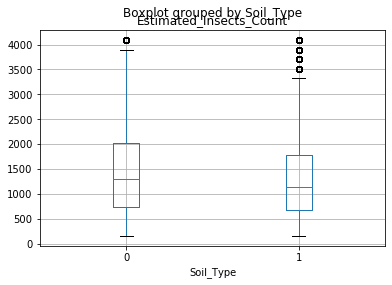

In [14]:
df.boxplot(column = ['Estimated_Insects_Count'], by = 'Soil_Type')

# Bivariant Analysis

<Figure size 432x288 with 0 Axes>

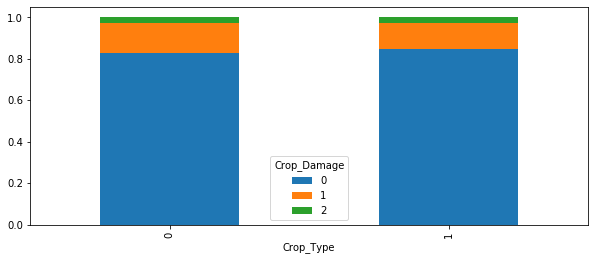

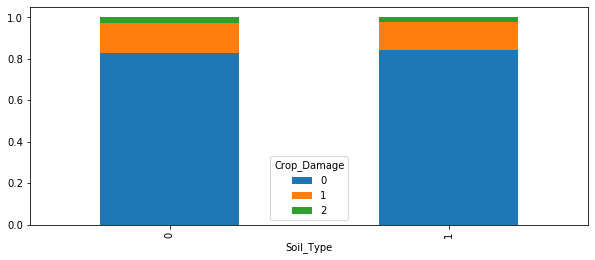

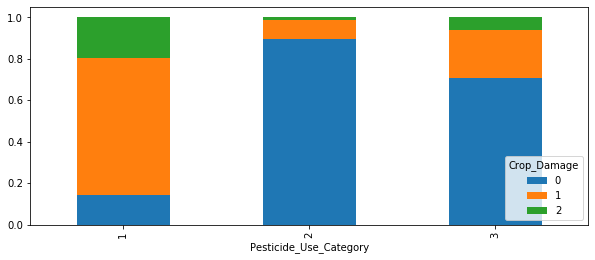

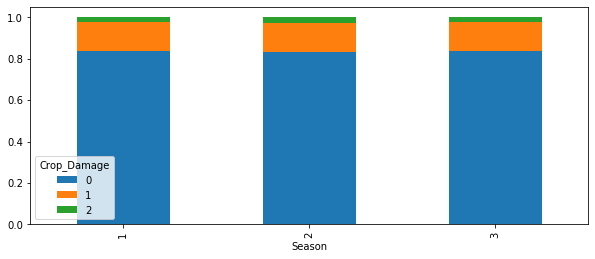

In [15]:
plt.figure(1)
#subplotplace = 221
for col in cat_col:
    p =pd.crosstab(df[col],df[tag_col]) 
    #plt.subplot(subplotplace)
    p.div(p.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
    #subplotplace += 1

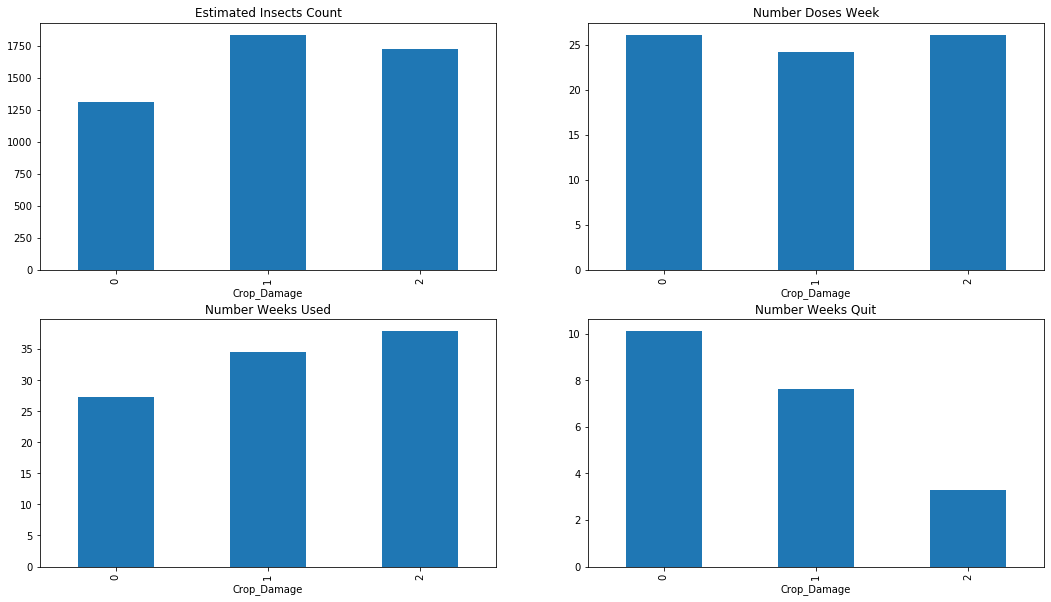

In [16]:
plt.figure(1)
subplotplace = 221
for col in num_col:
    plt.subplot(subplotplace)
    df.groupby(tag_col)[col].mean().plot.bar(figsize = (18,10),title = col.replace('_',' '))
    subplotplace += 1

In [17]:
df[df['Pesticide_Use_Category'] == 2].head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
707,F00001273,169,0,0,2,30,NaN,1,2,0
708,F00001275,232,0,0,2,20,NaN,9,2,0
709,F00001276,256,0,0,2,20,14.0,0,2,0
710,F00001282,312,0,0,2,35,26.0,1,2,0
711,F00001284,311,0,0,2,60,20.0,4,1,0


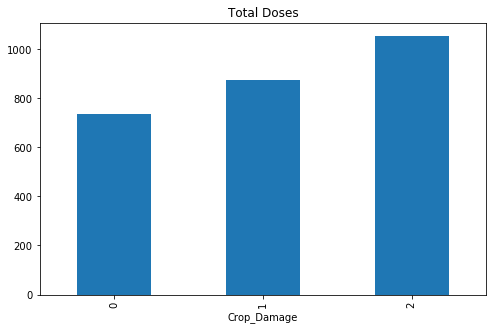

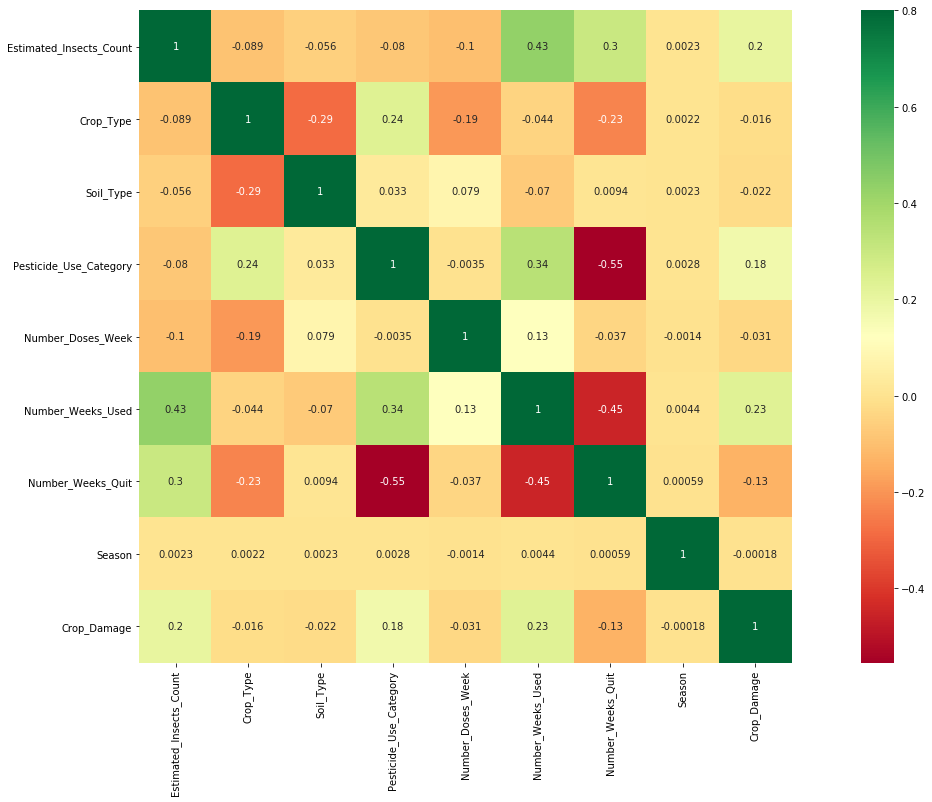

In [18]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

# Fill NA values

In [19]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

##### we will NA Values of "Number_Weeks_Used" with meadian of the "pesticide_used_category"
1 - 0
2 - 25
3 - 35

In [20]:
df.loc[(df['Pesticide_Use_Category'] ==1) & (df['Number_Weeks_Used'].isnull()),'Number_Weeks_Used'] = df[df['Pesticide_Use_Category'] ==1]['Number_Weeks_Used'].median()
df.loc[(df['Pesticide_Use_Category'] ==2) & (df['Number_Weeks_Used'].isnull()),'Number_Weeks_Used'] = df[df['Pesticide_Use_Category'] ==2]['Number_Weeks_Used'].median()
df.loc[(df['Pesticide_Use_Category'] ==3) & (df['Number_Weeks_Used'].isnull()),'Number_Weeks_Used'] = df[df['Pesticide_Use_Category'] ==3]['Number_Weeks_Used'].median()

In [21]:
df_test.loc[(df_test['Pesticide_Use_Category'] ==1) & (df_test['Number_Weeks_Used'].isnull()),'Number_Weeks_Used'] = df_test[df_test['Pesticide_Use_Category'] ==1]['Number_Weeks_Used'].median()
df_test.loc[(df_test['Pesticide_Use_Category'] ==2) & (df_test['Number_Weeks_Used'].isnull()),'Number_Weeks_Used'] = df_test[df_test['Pesticide_Use_Category'] ==2]['Number_Weeks_Used'].median()
df_test.loc[(df_test['Pesticide_Use_Category'] ==3) & (df_test['Number_Weeks_Used'].isnull()),'Number_Weeks_Used'] = df_test[df_test['Pesticide_Use_Category'] ==3]['Number_Weeks_Used'].median()

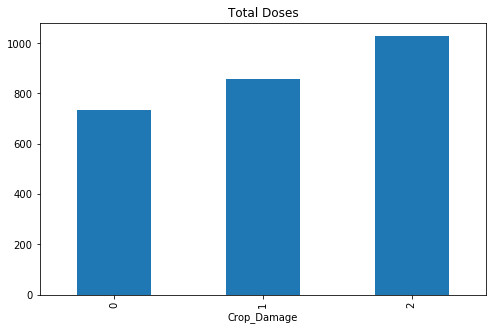

In [22]:
df['total_doses'] = (df['Number_Doses_Week'] * df['Number_Weeks_Used'] )
df_test['total_doses'] = df_test['Number_Doses_Week'] * df_test['Number_Weeks_Used']
df.groupby(tag_col)['total_doses'].mean().plot.bar(figsize = (8,5),title = 'Total Doses')

In [23]:
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
total_doses                0
dtype: int64

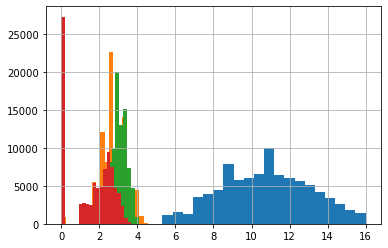

In [24]:
for col in num_col:
    df[col+"_log"] = np.cbrt(df[col]) 
    df[col+"_log"].hist(bins=20) 
    df_test[col+"_log"] = np.cbrt(df_test[col])

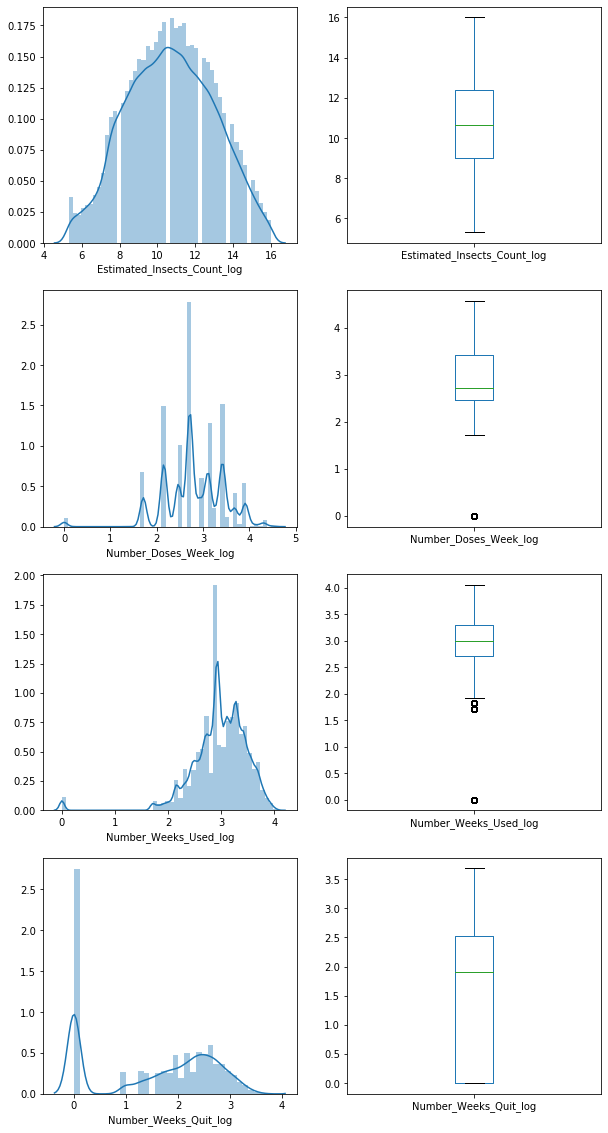

In [25]:
plt.figure(1,figsize = (10,20))
subplotplace = 421
for col in num_col:
    plt.subplot(subplotplace)
    sns.distplot(df[col+"_log"])
    subplotplace += 1
    plt.subplot(subplotplace)
    df[col+"_log"].plot.box()
    subplotplace += 1

# Modeling

In [26]:
for col in num_col:
    df.drop(col,axis = 1, inplace = True)
    
df.head()

,ID,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage,total_doses,Estimated_Insects_Count_log,Number_Doses_Week_log,Number_Weeks_Used_log,Number_Weeks_Quit_log
0,F00000001,1,0,1,1,0,0.0,5.728654,0.0,0.0,0.0
1,F00000003,1,0,1,2,1,0.0,5.934472,0.0,0.0,0.0
2,F00000004,1,0,1,2,1,0.0,6.357861,0.0,0.0,0.0
3,F00000005,1,1,1,2,1,0.0,6.357861,0.0,0.0,0.0
4,F00000006,1,0,1,2,1,0.0,6.993191,0.0,0.0,0.0


In [27]:
for col in num_col:
    df_test.drop(col,axis = 1, inplace = True)
    
df_test.head()

,ID,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,total_doses,Estimated_Insects_Count_log,Number_Doses_Week_log,Number_Weeks_Used_log,Number_Weeks_Quit_log
0,F00000002,1,1,1,2,0.0,5.728654,0.0,0.0,0.0
1,F00000007,1,1,1,2,0.0,7.428959,0.0,0.0,0.0
2,F00000011,1,0,1,2,0.0,8.554437,0.0,0.0,0.0
3,F00000013,1,0,1,2,0.0,9.008223,0.0,0.0,0.0
4,F00000014,0,0,1,1,0.0,9.240433,0.0,0.0,0.0


In [28]:
df = df.drop('ID', axis = 1)
df_test = df_test.drop('ID', axis = 1)

In [29]:
X = df.drop('Crop_Damage',1) 
y = df['Crop_Damage']

In [30]:
X=pd.get_dummies(X) 
df=pd.get_dummies(df) 
df_test=pd.get_dummies(df_test)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

# RandomForest1 Approach

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [184]:
classifier1 = RandomForestClassifier(n_estimators =500, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)
classifier2 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier2.fit(x_train, y_train)
classifier3 = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 0)
classifier3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [185]:
y_pred1 = classifier1.predict(x_cv)
y_pred2 = classifier2.predict(x_cv)
y_pred3 = classifier3.predict(x_cv)
y_pred=np.around((y_pred1+y_pred2+y_pred3)/3).astype(int)

In [186]:

cm = confusion_matrix(y_cv, y_pred)
#cmatrix(cm)

In [187]:

def pred_class(X):
    y_pred1 = classifier1.predict(X)
    y_pred2 = classifier2.predict(X)
    y_pred3 = classifier3.predict(X)
    y_pred=np.around((y_pred1+y_pred2+y_pred3)/3).astype(int)
    return y_pred

In [192]:
y_pred=pred_class(df_test)
#col1=pd.DataFrame(df_test['ID'])
col2=pd.DataFrame(y_pred)
col2.rename(columns={0: "Crop_Damage"},inplace=True)

In [193]:
col1=pd.DataFrame(df_test_original['ID'])
result=pd.DataFrame({"ID":col1['ID'],"Crop_Damage":col2['Crop_Damage']}).set_index(['ID']).to_csv('submission.csv')

# Random Forest Classifier

In [34]:
model = RandomForestClassifier() 
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
pred_cv = model.predict(x_cv)

In [36]:
accuracy_score(y_cv,pred_cv)

0.8209918223422612

In [37]:
pred_test = model.predict(df_test)

In [40]:
submission=pd.read_csv("submission.csv")
submission['Crop_Damage']=pred_test 
submission['ID']=df_test_original['ID']
pd.DataFrame(submission, columns=['ID','Crop_Damage']).to_csv('randomforest.csv',index = False)

In [41]:
from sklearn.model_selection import StratifiedKFold

In [52]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

    pred_test = model.predict(df_test)


1 of kfold 5
accuracy_score 0.8428426738690075

2 of kfold 5
accuracy_score 0.8428426738690075

3 of kfold 5
accuracy_score 0.8438555030384876

4 of kfold 5
accuracy_score 0.8417084013280063

5 of kfold 5
accuracy_score 0.8424962016768893


In [43]:
submission['Crop_Damage']=pred_test 
pd.DataFrame(submission, columns=['ID','Crop_Damage']).to_csv('randomforeststartified.csv',index = False)

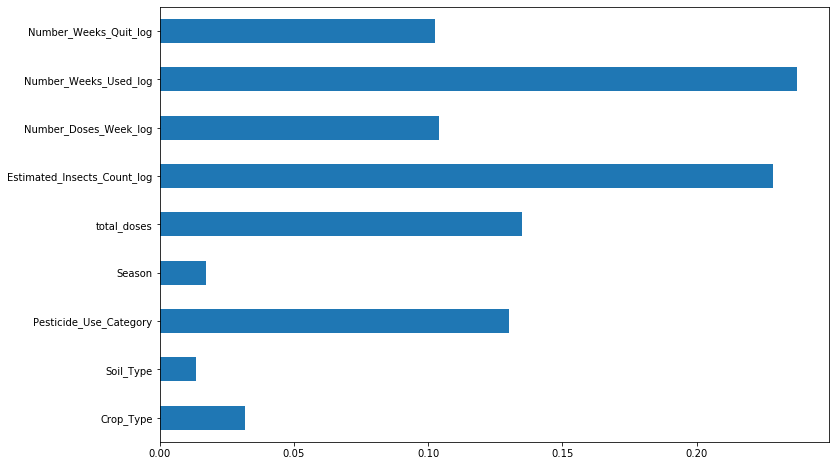

In [44]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8));

#### XGbooster

In [47]:
from xgboost import XGBClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(df_test) 
    pred3=model.predict_proba(df_test)[:,1]


1 of kfold 5
accuracy_score 0.8441368444744543

2 of kfold 5
accuracy_score 0.846106234526221

3 of kfold 5
accuracy_score 0.8465563808237677

4 of kfold 5
accuracy_score 0.8440718023746553

5 of kfold 5
accuracy_score 0.8466040177817793


In [48]:
submission['Crop_Damage']=pred_test 
pd.DataFrame(submission, columns=['ID','Crop_Damage']).to_csv('xgstartified.csv',index = False)

#### GridSearch

In [49]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [50]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [51]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [60]:

import re



from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout,GRU,BatchNormalization,Activation
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.layers.advanced_activations import PReLU


In [54]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length = 9,trainable = True))
model.add(Bidirectional(LSTM(128)))
#model.add(LSTM(128))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len_labels, activation = "softmax")) 

NameError: name 'vocab_size' is not defined

In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8207292370020257

In [63]:
need_validation = False
nb_epoch = 25
batch_size = 14

In [67]:
df.shape

(88858, 10)

In [83]:
#import tensorflow.keras.utils.to_categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_cv = to_categorical(y_cv, 3)

In [88]:
 def build_model():
    input_dim = df.shape[1] - 3
    classes = 3    
    
    model = Sequential()
    model.add(Dense(256, input_dim= 9)) 
    model.add(Dropout(0.1))
    model.add(PReLU())
#    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256))
    model.add(PReLU())
#    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(56))
    model.add(PReLU())
#    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer="adam")
    return model

In [89]:
model = build_model()
model.fit(x_train, y_train, validation_data=(x_cv, y_cv), epochs = nb_epoch, batch_size= batch_size, verbose =1)

Epoch 1/25


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [14,3] and labels shape [126]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-89-bbf336559185>:2) ]] [Op:__inference_train_function_4516]

Function call stack:
train_function


In [78]:
x_train.shape

(62200, 9)

In [79]:
y_train.shape

(62200,)